In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

## read data, separate into train_val and test

In [2]:
teds = pd.read_csv('./data/ted_main.csv',header=0)
transcripts = pd.read_csv('./data/transcripts.csv',header=0)

In [83]:
train = teds.sample(2000)
test = teds.drop(train_val.index)

x_train = train[['duration','comments']]
y_train  = train['views']

x_test = test[['duration','comments']]
y_test = test['views']

print len(x_train)
print len(x_test)

2000
550


In [84]:
# 1  durations distribution

temp = teds[['views','duration']]
temp['rank'] = temp['views'].rank()
newtemp = temp.sort_values("views",ascending=False) 
newtemp.head(5)

/Users/xuzhaokai/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,views,duration,rank
0,47227110,1164,2550.0
1346,43155405,1262,2549.0
677,34309432,1084,2548.0
837,31168150,1219,2547.0
452,22270883,1003,2546.0


In [85]:
# 2  comments distribution 
comments_dict = teds['comments'].value_counts()
print comments_dict.head()

45    22
43    20
49    20
42    20
36    20
Name: comments, dtype: int64


In [40]:
def printResult(y_predict,the_y_test):
    trueCount = 0 
    falseCount = 0 

    for i in range(len(the_y_test)):
        if ( float(the_y_test.values[i])/y_predict[i] < 1.5 and  float(y_predict[i])/the_y_test.values[i] > 0.67 ):
            trueCount += 1
        else:
            falseCount += 1

    print "True Count: ", trueCount
    print "False Count: ",falseCount
    print "Accuracy: ", float(trueCount)/(trueCount+ falseCount)
    return float(trueCount)/(trueCount+ falseCount)

## 1. linear regression 

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)

print "coef: ",reg.coef_
print "intercept",  reg.intercept_ 

y_predict = reg.predict(x_test)

printResult(y_predict,y_test)

coef:  [-182.9899449 6075.9305726]
intercept 703165.5012158614
True Count:  466
False Count:  84
Accuracy:  0.847272727273


0.8472727272727273

In [68]:
predicted = [y_predict[20], y_predict[22], y_predict[30], y_predict[17],y_predict[15]] 
actural  = [y_test.values[20], y_test.values[22], y_test.values[30], y_test.values[17],y_test.values[15] ]
print predicted
print actural

[782213.1151206233, 710945.5357435186, 1403909.6861775878, 1009638.9982572923, 825324.2173344847]
[609087, 779873, 1712075, 643078, 606311]


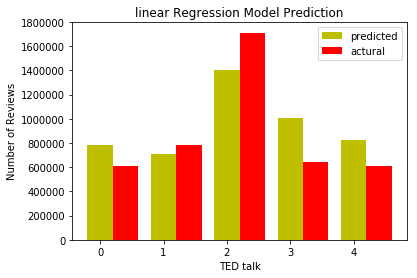

In [70]:
import matplotlib.pyplot as plt

x =list(range(len( predicted)))
 
total_width, n = 0.8, 2
width = total_width / n

plt.bar(x,  predicted, width=width, label='predicted',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, actural, width=width, label='actural',fc = 'r')
plt.legend()
plt.xlabel("TED talk")
plt.ylabel("Number of Reviews")
plt.title ('linear Regression Model Prediction')
plt.show()


In [121]:
import statsmodels.api as sm

X_train = sm.add_constant(x_train.values)
model = sm.OLS(y_train.values, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 04 Dec 2018   Prob (F-statistic):          1.35e-123
Time:                        22:30:17   Log-Likelihood:                -31965.
No. Observations:                2000   AIC:                         6.394e+04
Df Residuals:                    1997   BIC:                         6.395e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.064e+06   1.15e+05      9.278      0.000    8.39e+05    1.29e+06
x1          -221.4032    124.869     -1.773      0.076    -466.290      23.484
x2          4158.1224    162.888     25.528      0.000    3838.675    4477.570
==============================================================================
Omnibus:                     2015.736   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269049.970
Skew:                           4.506   Prob(JB):                         0.00
Kurtosis:                      59.101   Cond. No.                     2.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2  Rigid regression

In [94]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train) 

print "coef: ",clf.coef_
print "intercept",  clf.intercept_ 

y_predict = clf.predict(x_test)

printResult(y_predict,y_test)

coef:  [-221.40318    4158.12233929]
intercept 1064097.0738071727
True Count:  483
False Count:  67
Accuracy:  0.878181818182


0.8781818181818182

In [103]:
predicted = y_predict[30:35]
actural = y_test[30:35]
print predicted
print actural.values

[1372279.28238953 1000213.76557295 1057005.37940349  935285.56480689
 1649460.74015802]
[1712075 1609555  562457  707524 1604402]


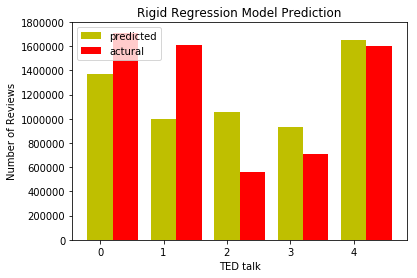

In [105]:
import matplotlib.pyplot as plt

x =list(range(len( predicted)))
 
total_width, n = 0.8, 2
width = total_width / n

plt.bar(x,  predicted, width=width, label='predicted',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, actural, width=width, label='actural',fc = 'r')
plt.legend()
plt.xlabel("TED talk")
plt.ylabel("Number of Reviews")
plt.title ('Rigid Regression Model Prediction')
plt.show()


## 3 Lasso Regression

In [124]:
from sklearn.linear_model import Lasso


clf = Lasso()
clf.fit(x_train, y_train) 

print "coef: ",clf.coef_
print "intercept",  clf.intercept_ 

y_predict = clf.predict(x_test)

printResult(y_predict,y_test)

coef:  [-221.40317507 4158.12235104]
intercept 1064097.0674153266
True Count:  483
False Count:  67
Accuracy:  0.878181818182


0.8781818181818182

## 4. poly regression

In [93]:
print x_train.values
print y_train.values

[[1772  116]
 [ 791   65]
 [ 599   39]
 ...
 [ 404   95]
 [ 960   96]
 [1020  101]]
[ 532759 1149641 1107309 ...  991694  713999 1750573]


In [90]:
import numpy as np

degreeList = range(3,6)

for degree in degreeList: 
    model = np.polyfit(x_train.values, y_train, degree)
    print model
    y_predict = model(x_test)
    printResult(y_predict,y_test)
    
    

TypeError: expected 1D vector for x

In [324]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

C_list = [.001, .01, .1, 1, 10]
acc_list = []

for c in C_list:
    clf = LogisticRegression(C=c).fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print "\nC = ", c
    acc = printResult(y_predict,y_test)
    acc_list.append(acc)
    


C =  0.001
trueCount:  707
falseCount:  343
accuracy:  0.673333333333

C =  0.01
trueCount:  791
falseCount:  259
accuracy:  0.753333333333

C =  0.1
trueCount:  800
falseCount:  250
accuracy:  0.761904761905

C =  1
trueCount:  789
falseCount:  261
accuracy:  0.751428571429

C =  10
trueCount:  777
falseCount:  273
accuracy:  0.74


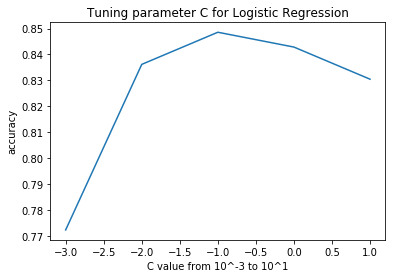

In [305]:

plt.plot([-3,-2,-1,0,1],acc_list)
plt.title ("Tuning parameter C for Logistic Regression")
plt.xlabel("C value from 10^-3 to 10^1")
plt.ylabel("accuracy")


In [314]:
testing = teds.sample(550)


x_testing = testing[['duration','comments']]
y_testing = testing['views']

clf = LogisticRegression(C=.1).fit(x_train, y_train)
y_predict = clf.predict(x_testing)
print "\nC = 0.1"
printResult(y_predict,y_testing)


C = 0.1
trueCount:  466
falseCount:  84
accuracy:  0.847272727273


0.8472727272727273